In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

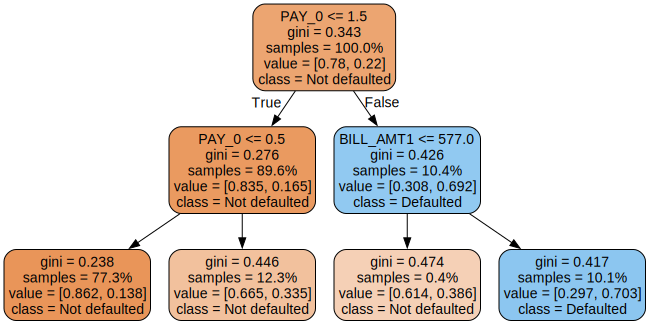

In [5]:
dot_data = tree.export_graphviz(dt,
out_file=None,
filled=True,
rounded=True,
feature_names=\
features_response[:-1],
proportion=True,
class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph